In [1]:
#!/usr/bin/env python3
"""
Trolley Problem Analysis - Complete Bayesian Workflow
=====================================================
Using Our bayes_ordinal Package
Following PyMC Documentation Structure
Logit Model Analysis
=====================================================
"""

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import xarray as xr

# Import our bayes_ordinal package
import sys
sys.path.append('..')
import bayes_ordinal as bo

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("TROLLEY PROBLEM ANALYSIS - COMPLETE BAYESIAN WORKFLOW")
print("=" * 60)
print("Using Our bayes_ordinal Package")
print("Following PyMC Documentation Structure")
print("Logit Model Analysis")
print("=" * 60)

TROLLEY PROBLEM ANALYSIS - COMPLETE BAYESIAN WORKFLOW
Using Our bayes_ordinal Package
Following PyMC Documentation Structure
Logit Model Analysis


In [2]:
print("1. Loading and Cleaning Data...")
print("=" * 50)

# Load the trolley dataset with correct separator
data = pd.read_csv("../Dataset/Trolley.csv", sep=';')
print(f"✓ Raw dataset shape: {data.shape}")

# Clean the data
data = data.dropna()
print(f"✓ Cleaned dataset shape: {data.shape}")

# Check response variable
print(f"✓ Response range: {data['response'].min()} to {data['response'].max()}")
print(f"✓ Number of categories: {data['response'].nunique()}")
print(f"✓ Features: {['action', 'intention', 'contact']}")

# Display response distribution
print("\nResponse distribution:")
print(data['response'].value_counts().sort_index())

# Prepare features
feature_cols = ['action', 'intention', 'contact']
X = data[feature_cols].values
y = data['response'].values

# Convert to 0-based indexing for PyMC
y_zero_based = y - 1

1. Loading and Cleaning Data...
✓ Raw dataset shape: (9930, 12)
✓ Cleaned dataset shape: (9930, 12)
✓ Response range: 1 to 7
✓ Number of categories: 7
✓ Features: ['action', 'intention', 'contact']

Response distribution:
response
1    1274
2     909
3    1071
4    2323
5    1462
6    1445
7    1446
Name: count, dtype: int64


In [3]:
print("\n2. Data Validation...")
print("=" * 50)

# Validate data using our package
validation_results = bo.validate_ordinal_data(y_zero_based, X)
print("✓ Data validation completed")


2. Data Validation...
✓ Data validation completed


In [4]:
print("\n3. Data Exploration...")
print("=" * 50)

# Feature summary
print("Feature Summary:")
for i, col in enumerate(feature_cols):
    print(f"  {col}: mean={X[:, i].mean():.3f}, std={X[:, i].std():.3f}")

# Correlation matrix
corr_matrix = pd.DataFrame(X, columns=feature_cols).corr()
print(f"\nFeature Correlation Matrix:")
print(corr_matrix.round(3))

print("✓ Data exploration completed")


3. Data Exploration...
Feature Summary:
  action: mean=0.433, std=0.496
  intention: mean=0.467, std=0.499
  contact: mean=0.200, std=0.400

Feature Correlation Matrix:
           action  intention  contact
action      1.000     -0.144   -0.437
intention  -0.144      1.000    0.033
contact    -0.437      0.033    1.000
✓ Data exploration completed


In [5]:
print("\n4. Prior Specification...")
print("=" * 50)

# Get default priors using our package
priors = bo.get_default_priors()

print("Prior Specifications:")
for key, value in priors.items():
    print(f"  {key}: {value}")
print("✓ Priors specified using our package")


4. Prior Specification...
Prior Specifications:
  coef_mu: 0.0
  coef_sigma: 1.0
  u_sigma: 1.0
  gamma_mu: 0.0
  gamma_sigma: 1.0
  cut_min: 0.0
  cut_max: 1.0
  cut_mu: 0.0
  cut_sigma: 1.0
✓ Priors specified using our package



5. Building Model (Using Our Package)...
Building logit model...
✓ Logit model built successfully

Model Structure:
Model Structure (PyMC Graphviz):


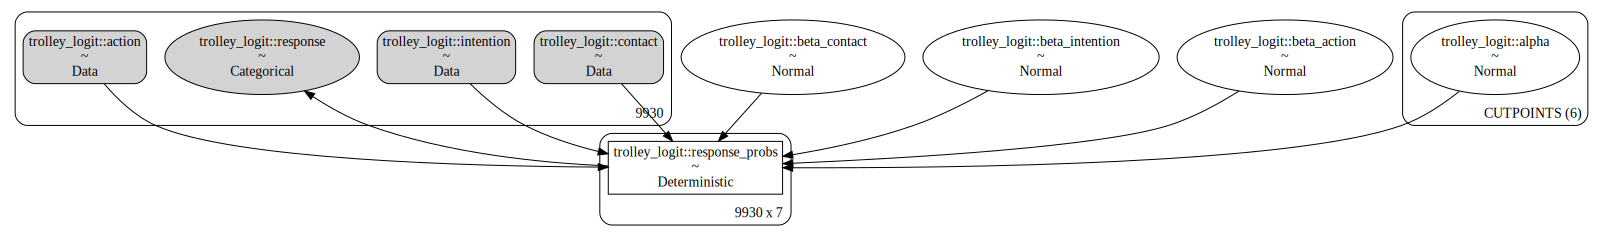

✓ Graphviz visualization displayed successfully!


In [6]:
print("\n5. Building Model (Using Our Package)...")
print("=" * 50)

print("Building logit model...")

# Build the logit model using our package
logit_model = bo.cumulative_model(
    y=y_zero_based,
    X=X,
    link="logit",
    priors=priors,
    model_name="trolley_logit",
    feature_names=feature_cols
)

print("✓ Logit model built successfully")

# Display model structure
print("\nModel Structure:")
print("Model Structure (PyMC Graphviz):")

# Import pymc and create the model structure
import pymc as pm

# Create the graphviz visualization
model_graph = pm.model_to_graphviz(logit_model)

display(model_graph)
print("✓ Graphviz visualization displayed successfully!")

Sampling: [trolley_logit::alpha, trolley_logit::beta_action, trolley_logit::beta_contact, trolley_logit::beta_intention, trolley_logit::response]



6. Prior Predictive Checks (Using Our Package)...
Running prior predictive checks for logit model...
✓ R² samples skipped (requires posterior samples)
Using prior predictive variable: trolley_logit::response


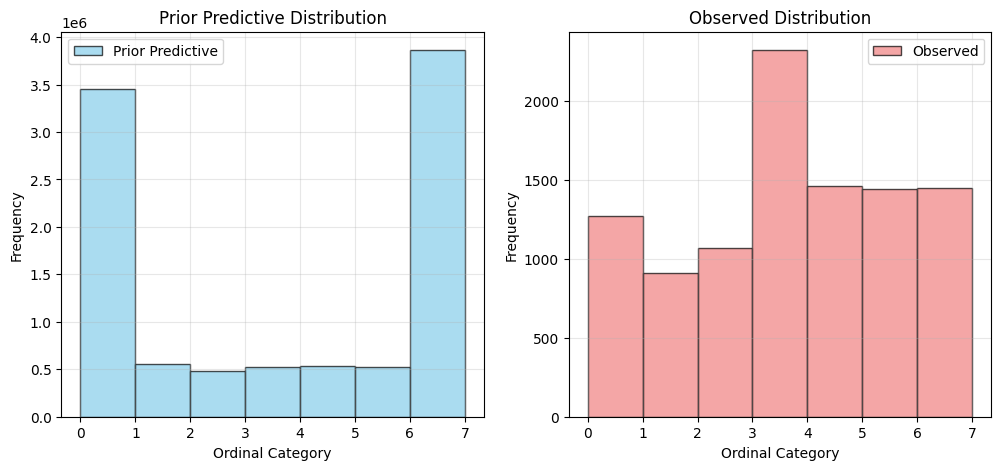

✓ Logit prior predictive completed


In [7]:
print("\n6. Prior Predictive Checks (Using Our Package)...")
print("=" * 50)

print("Running prior predictive checks for logit model...")

# Run prior predictive checks
prior_pred_logit = bo.run_prior_predictive(
    model=logit_model,
    draws=1000,
    plot=True,
    include_r2=True,
    y_obs=y_zero_based
)

print("✓ Logit prior predictive completed")

In [8]:
print("\n7. Model Fitting...")
print("=" * 50)

print("Fitting logit model...")

# Fit the model using our package
idata_logit = bo.fit_model(
    model=logit_model,
    chains=4,
    draws=1500,
    tune=1000
)

print("✓ Logit model fitting completed")

Initializing NUTS using jitter+adapt_diag...



7. Model Fitting...
Fitting logit model...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [trolley_logit::beta_action, trolley_logit::beta_intention, trolley_logit::beta_contact, trolley_logit::alpha]


Sampling 4 chains for 1_000 tune and 1_500 draw iterations (4_000 + 6_000 draws total) took 44 seconds.


✓ Logit model fitting completed



8. Model Diagnostics (Using Our Package)...
Advanced diagnostics (LOO-PIT, energy plots, trace plots) skipped for stability
Use basic summary for convergence assessment
  Max R-hat: 1.000
✓ Diagnostic summary completed
  Model: logit_model
  Summary shape: (9, 11)
  R-hat column exists: True
  R-hat values: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  Converged: True
Creating diagnostic plots...
✓ Creating energy plot...


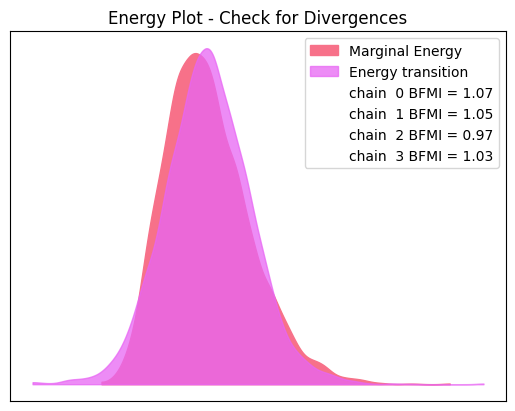

✓ Creating trace plots...


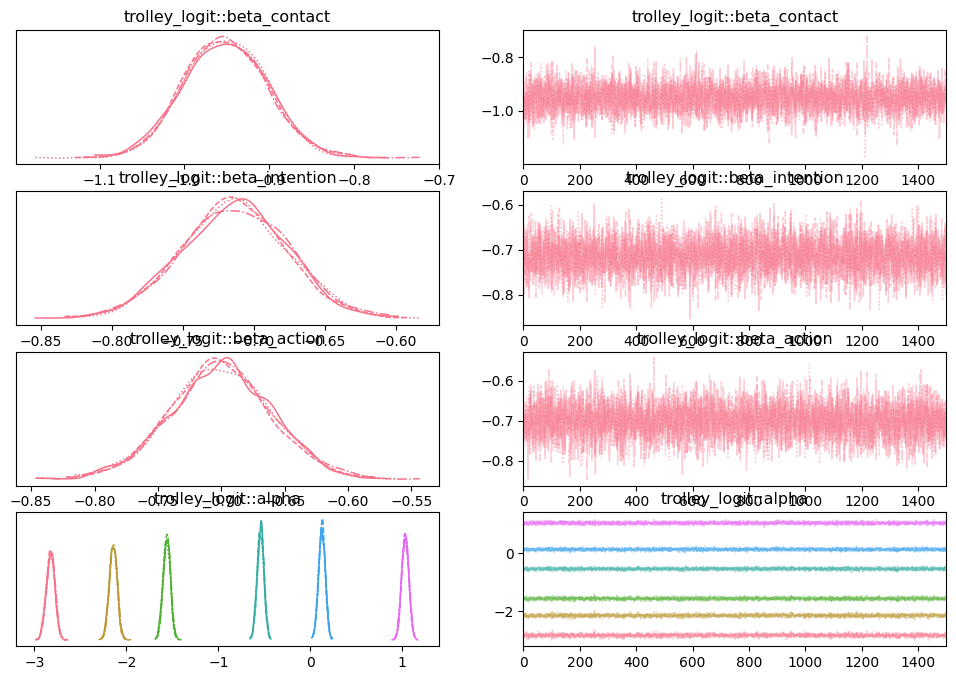

✓ Creating rank plots...


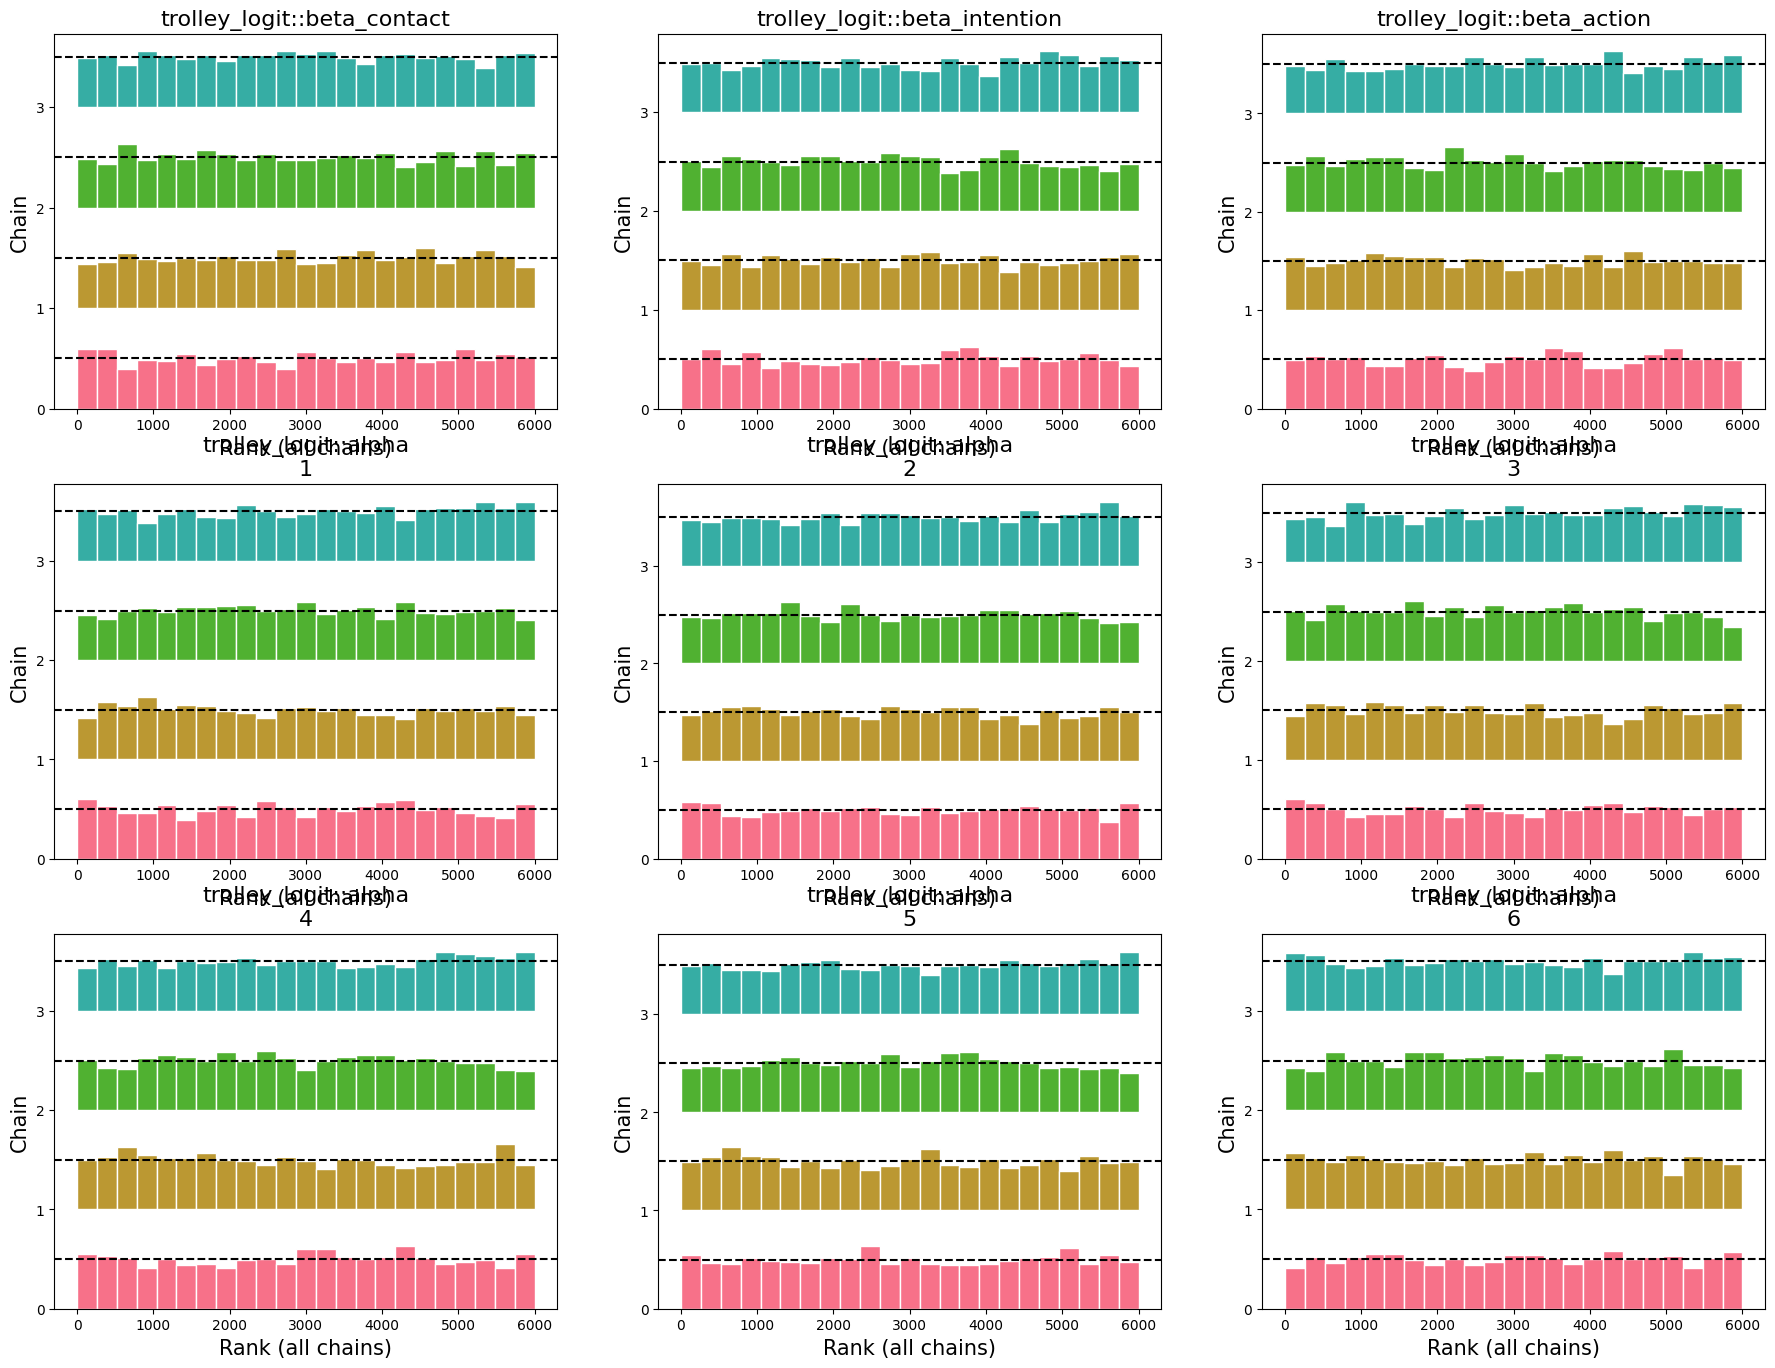

✓ Creating autocorrelation plots...


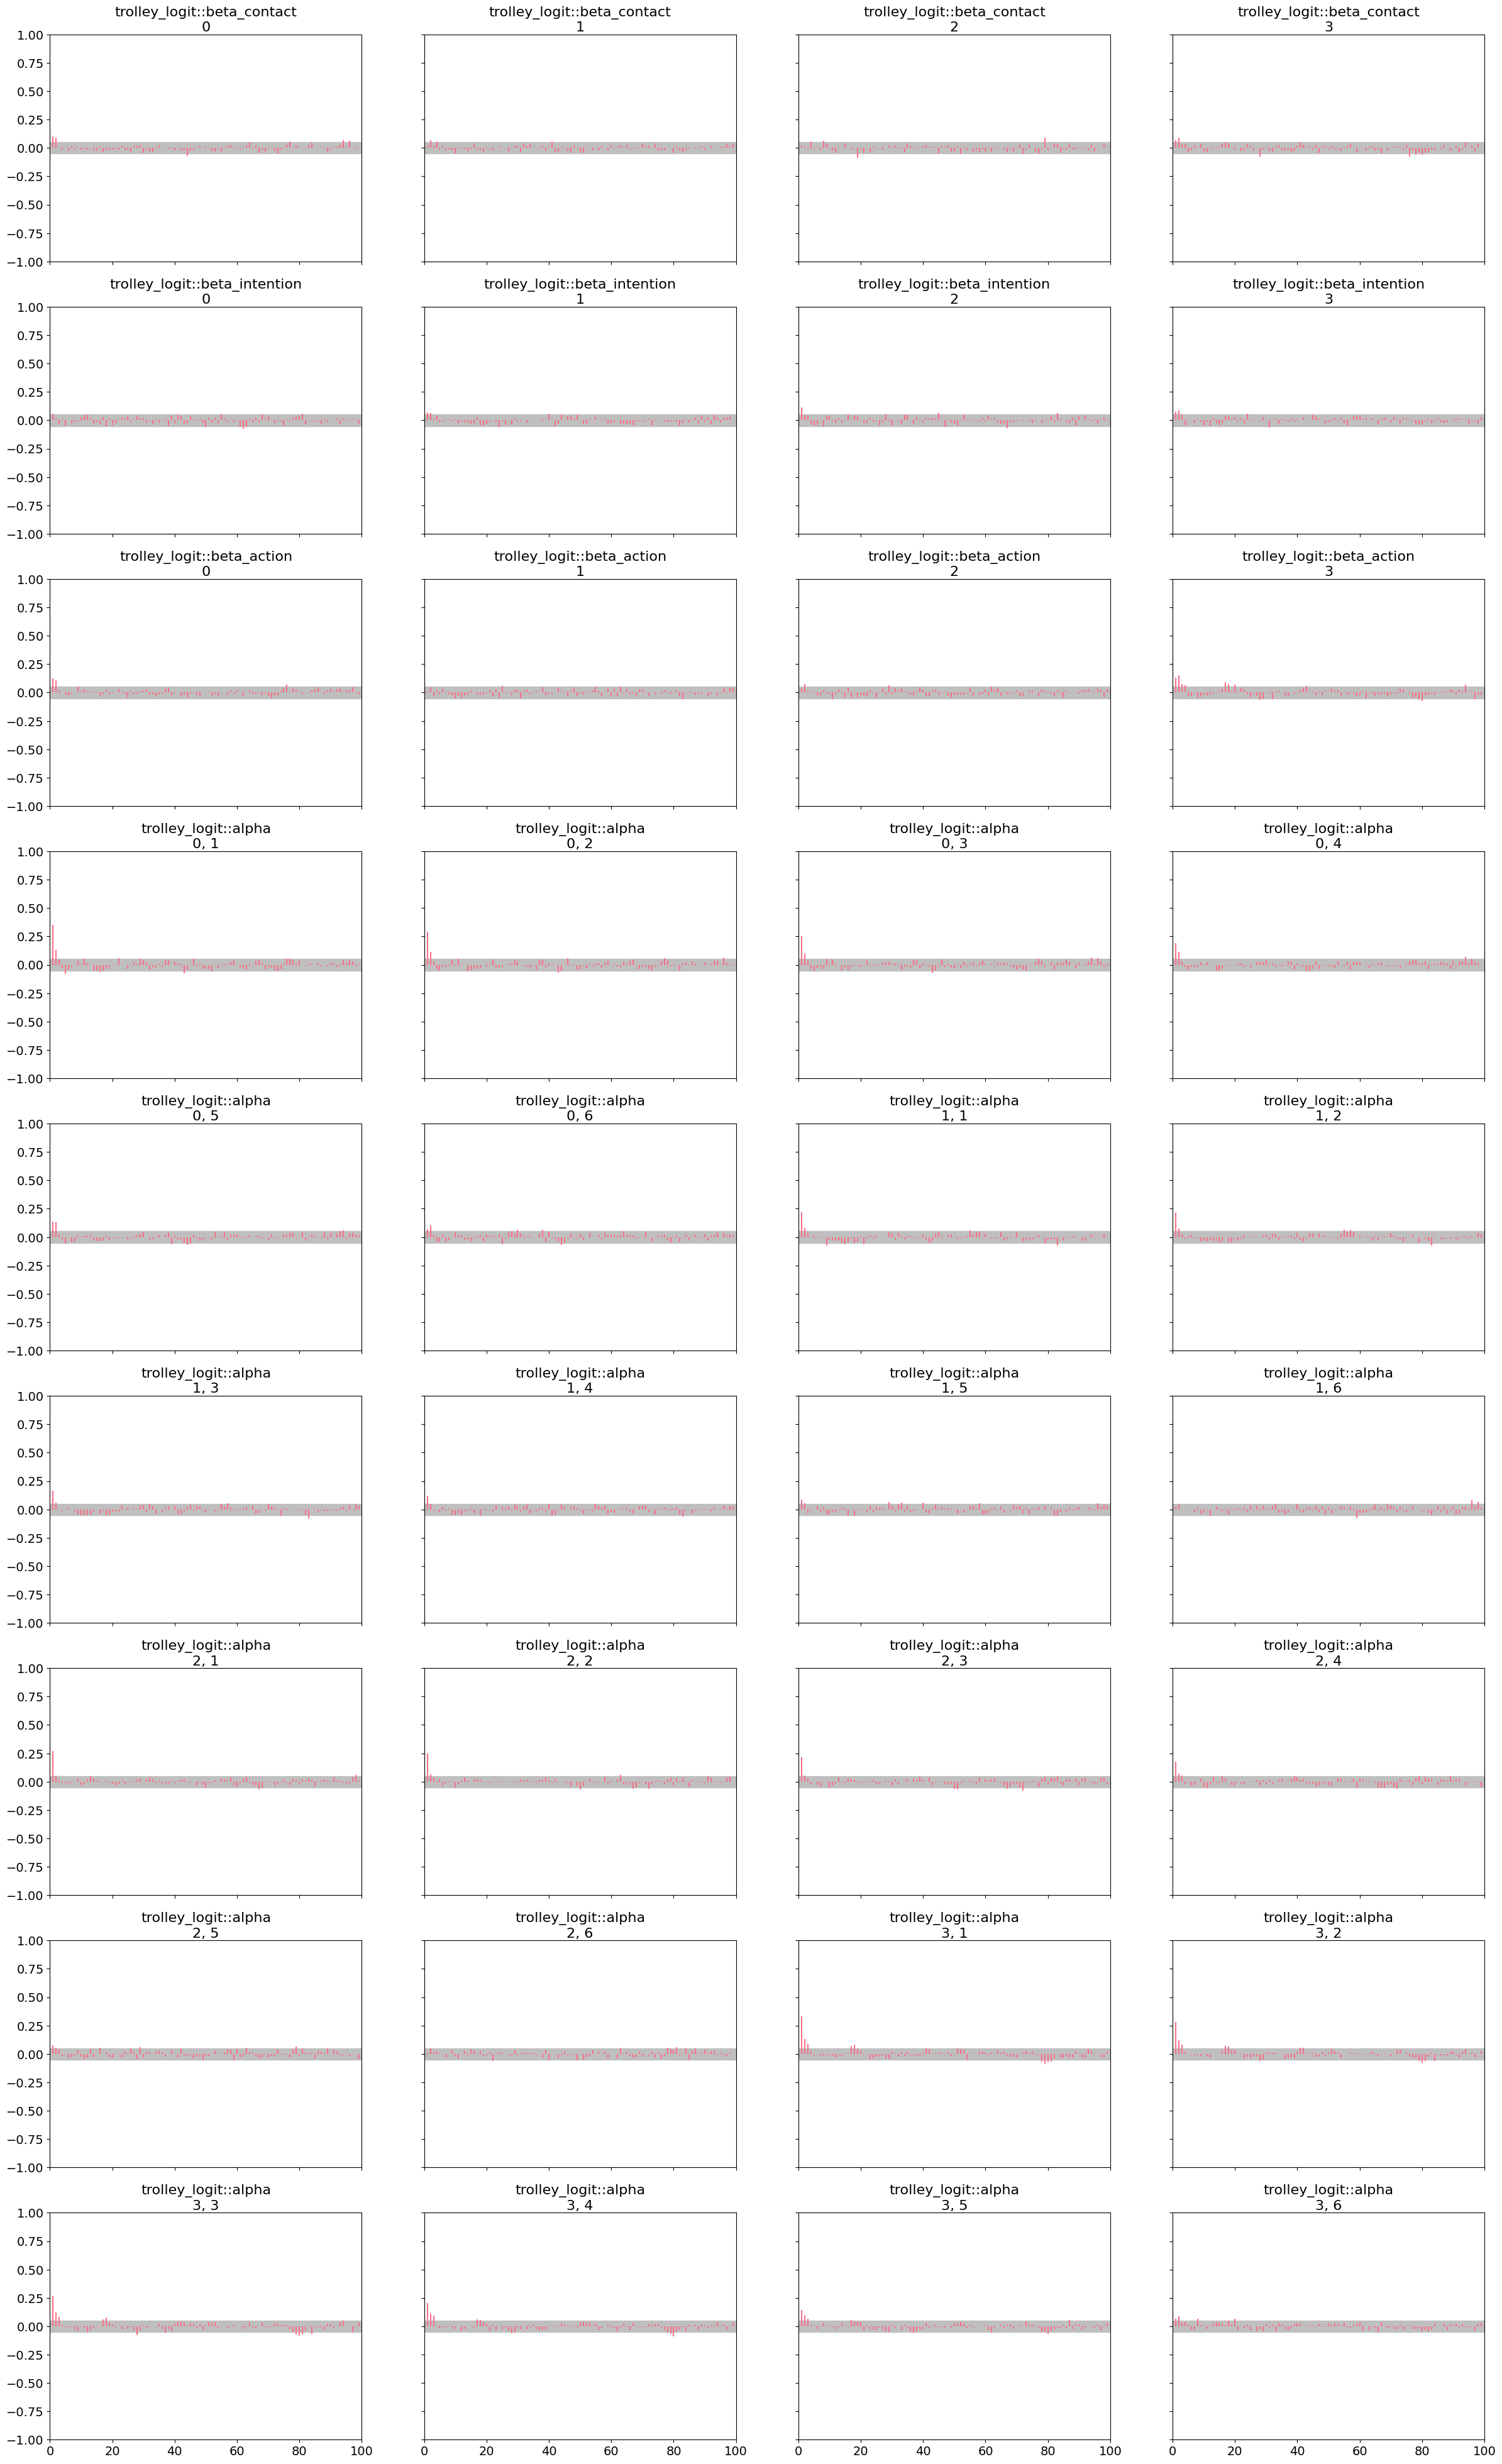

✓ Diagnostic plots completed
✓ Diagnostic plots completed
✓ Model diagnostics completed
  Converged: True


In [9]:
# Cell 9: Model Diagnostics (Using Our Fixed Package)
print("\n8. Model Diagnostics (Using Our Package)...")
print("=" * 50)

# Run comprehensive diagnostics
results = bo.run_comprehensive_diagnostics(
    idata_logit,
    var_names=["trolley_logit::beta_contact", "trolley_logit::beta_intention", 
               "trolley_logit::beta_action", "trolley_logit::alpha"],
    model_name="logit_model",
    include_plots=True,
    include_summary=True
)

print(f"✓ Model diagnostics completed")
print(f"  Converged: {results['converged']}")
if results["recommendations"]:
    print(f"  Recommendations: {', '.join(results['recommendations'])}")

In [10]:
print("\n7. Model Fitting...")
print("=" * 50)

print("Fitting logit model...")

# Fit the model using our package
idata_logit = bo.fit_model(
    model=logit_model,
    chains=4,
    draws=1500,
    tune=1000
)

print("✓ Logit model fitting completed")

Initializing NUTS using jitter+adapt_diag...



7. Model Fitting...
Fitting logit model...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [trolley_logit::beta_action, trolley_logit::beta_intention, trolley_logit::beta_contact, trolley_logit::alpha]


Sampling 4 chains for 1_000 tune and 1_500 draw iterations (4_000 + 6_000 draws total) took 49 seconds.


✓ Logit model fitting completed


Sampling: [trolley_logit::response]



9. Posterior Predictive Checks (Using Our Package)...
Running posterior predictive checks for logit model...


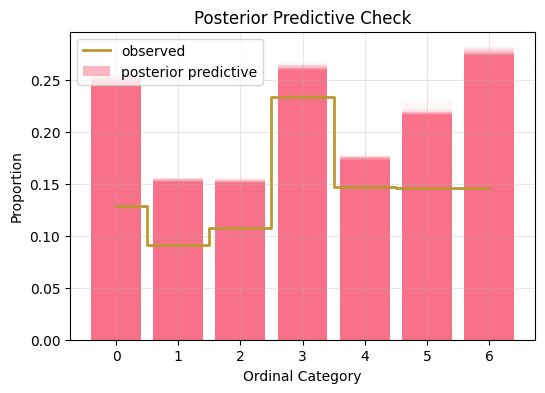

✓ Logit posterior predictive completed


In [12]:
print("\n9. Posterior Predictive Checks (Using Our Package)...")
print("=" * 50)

print("Running posterior predictive checks for logit model...")

# Run posterior predictive checks
ppc_logit = bo.run_posterior_predictive(
    logit_model,
    idata_logit,
    var_name="trolley_logit::response",
    kind="proportions"
)

print("✓ Logit posterior predictive completed")


10. Parameter Visualization (Using ArviZ - Like OC Documentation)...
Plotting logit model parameters...
Parameter Summary (Like OC Documentation):
                                mean     sd  hdi_3%  hdi_97%  mcse_mean  \
trolley_logit::beta_contact   -0.952  0.049  -1.038   -0.856      0.001   
trolley_logit::beta_intention -0.714  0.037  -0.784   -0.644      0.001   
trolley_logit::beta_action    -0.700  0.040  -0.772   -0.620      0.001   
trolley_logit::alpha[1]       -2.824  0.046  -2.910   -2.738      0.001   
trolley_logit::alpha[2]       -2.143  0.042  -2.222   -2.066      0.001   
trolley_logit::alpha[3]       -1.561  0.039  -1.636   -1.489      0.001   
trolley_logit::alpha[4]       -0.541  0.036  -0.613   -0.476      0.001   
trolley_logit::alpha[5]        0.126  0.036   0.059    0.194      0.001   
trolley_logit::alpha[6]        1.032  0.039   0.958    1.102      0.001   

                               mcse_sd  ess_bulk  ess_tail  r_hat  
trolley_logit::beta_contact      

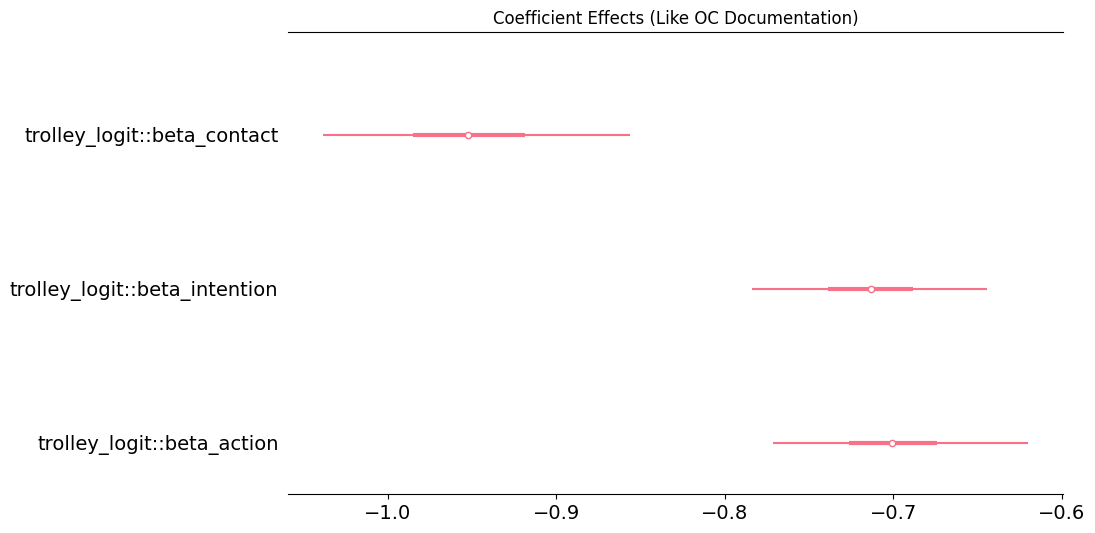

✓ Parameter visualization completed


In [13]:
print("\n10. Parameter Visualization (Using ArviZ - Like OC Documentation)...")
print("=" * 50)

print("Plotting logit model parameters...")

# Use ArviZ summary like OC documentation
import arviz as az

# Get summary of all parameters (like OC documentation)
summary = az.summary(
    idata_logit,
    var_names=["trolley_logit::beta_contact", "trolley_logit::beta_intention", 
               "trolley_logit::beta_action", "trolley_logit::alpha"]
)

print("Parameter Summary (Like OC Documentation):")
print(summary)

# Plot forest plot using ArviZ (like OC documentation)
az.plot_forest(
    idata_logit,
    var_names=["trolley_logit::beta_contact", "trolley_logit::beta_intention", 
               "trolley_logit::beta_action"],
    combined=True,
    figsize=(10, 6)
)
plt.title("Coefficient Effects (Like OC Documentation)")
plt.show()

print("✓ Parameter visualization completed")

Sampling: [trolley_logit::response]



12. Counterfactual Analysis (Using Our Package)...
Counterfactual scenarios:
  Baseline: action=0, intention=0, contact=0
  High Action: action=1, intention=0, contact=0
  High Intention: action=0, intention=1, contact=0
  High Contact: action=0, intention=0, contact=1
  Action + Intention: action=1, intention=1, contact=0
  Action + Contact: action=1, intention=0, contact=1
  Intention + Contact: action=0, intention=1, contact=1
  All High: action=1, intention=1, contact=1


Sampling: [trolley_logit::response]


Sampling: [trolley_logit::response]


Sampling: [trolley_logit::response]


Sampling: [trolley_logit::response]


Sampling: [trolley_logit::response]


Sampling: [trolley_logit::response]


Sampling: [trolley_logit::response]


✓ Counterfactual analysis completed

Counterfactual Analysis Results:
  Baseline: Mean = 5.03, Std = 1.75
  High Action: Mean = 4.32, Std = 1.85
  High Intention: Mean = 4.31, Std = 1.85
  High Contact: Mean = 4.06, Std = 1.87
  Action + Intention: Mean = 3.57, Std = 1.86
  Action + Contact: Mean = 3.32, Std = 1.84
  Intention + Contact: Mean = 3.30, Std = 1.84
  All High: Mean = 2.61, Std = 1.70

Creating counterfactual plots...


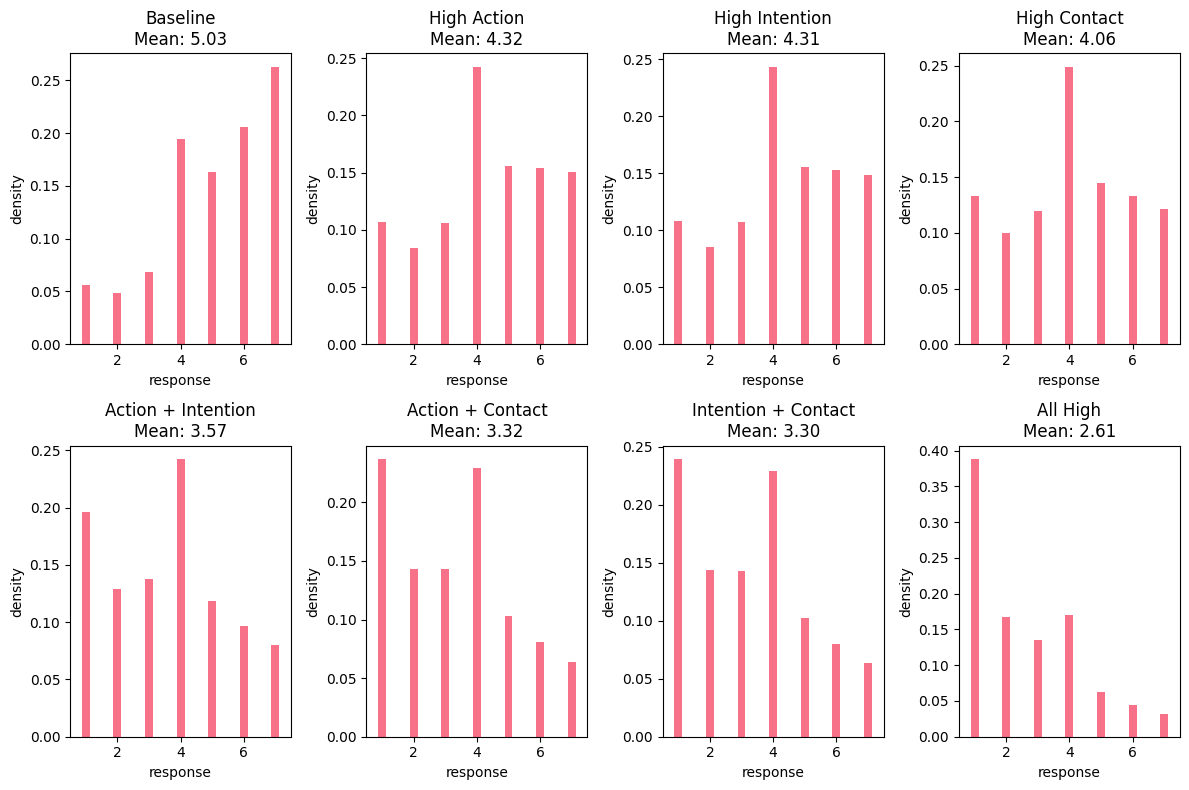

<Figure size 640x480 with 0 Axes>

✓ Counterfactual visualization completed


In [14]:
print("\n12. Counterfactual Analysis (Using Our Package)...")
print("=" * 50)

# Define counterfactual scenarios
scenarios = {
    "Baseline": {"action": 0, "intention": 0, "contact": 0},
    "High Action": {"action": 1, "intention": 0, "contact": 0},
    "High Intention": {"action": 0, "intention": 1, "contact": 0},
    "High Contact": {"action": 0, "intention": 0, "contact": 1},
    "Action + Intention": {"action": 1, "intention": 1, "contact": 0},
    "Action + Contact": {"action": 1, "intention": 0, "contact": 1},
    "Intention + Contact": {"action": 0, "intention": 1, "contact": 1},
    "All High": {"action": 1, "intention": 1, "contact": 1}
}

print("Counterfactual scenarios:")
for name, values in scenarios.items():
    print(f"  {name}: action={values['action']}, intention={values['intention']}, contact={values['contact']}")

# Run counterfactual analysis using our fixed package
counterfactual_results = bo.run_counterfactual_analysis(
    logit_model,
    idata_logit,
    scenarios,
    feature_names=feature_cols
)

print("✓ Counterfactual analysis completed")

# Display results
print("\nCounterfactual Analysis Results:")
for scenario_name, result in counterfactual_results.items():
    print(f"  {scenario_name}: Mean = {result['mean']:.2f}, Std = {result['std']:.2f}")

# Visualize results
print("\nCreating counterfactual plots...")
bo.plot_counterfactual_results(counterfactual_results)

print("✓ Counterfactual visualization completed")